In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

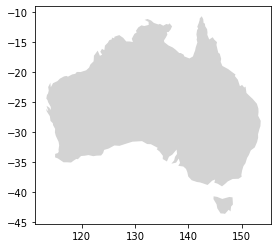

In [12]:
countries[countries["name"] == "Australia"].plot(color="lightgrey")

In [56]:
import chardet

with open('data/Sites.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

In [57]:
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [76]:
df = pd.read_csv('data/ResourceEstimates.csv')
df.head()


,SiteCode,ShortTitle,ResourceCode,StartDate,EndDate,ReportingStandard,JORCCategory,JORCStatus,IN_TOTAL_FLAG,In Total Type,...,ContainedMetal,ContainedMetalUnit,CutOffGrade,CutOffGradeUnit,HeavyMineralPct,TargetCommodityGroup,Site_MineralizationStyle,Site_SecondaryMineralizationStyle,Resource_MineralizationStyle,Resource_SecondaryMineralizationStyle
0,S0000001,Pieces of Eight,1,13/07/2005,14/09/2006,Unknown,Resource,Inferred,No,Not in Total,...,903.50,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Unknown/Unassigned,Unknown/Unassigned,Unknown/Unassigned
1,S0000002,Albury Heath,2,30/06/1999,01/10/2003,Unknown,Resource,Indicated,No,Not in Total,...,379.48,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Au in shears or faults
2,S0000002,Albury Heath,3,04/06/2003,06/02/2017,Unknown,Resource,Measured,Yes,Resources,...,108.16,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned
3,S0000002,Albury Heath,4,04/06/2003,06/02/2017,Unknown,Resource,Indicated,Yes,Resources,...,361.68,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned
4,S0000002,Albury Heath,28452,07/02/2017,11/03/2019,"JORC (Australia, version unknown)",Resource,Indicated,Yes,Resources,...,675.00,kilogram,0.5,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned


In [77]:
sites = pd.read_csv('data/Sites.csv', encoding=result['encoding'])

sites.head()

,SiteCode,ShortTitle,Title,Type,SubType,Stage,Confidentiality,ProjectCode,ProjectTitle,Latitude,...,MapSheetNo250k,MapSheetName250k,LGAName,DevelopmentRegion,DistrictNo,DistrictName,TectonicUnit,EILFlag,EISFlag,GBRMFlag
0,S0000001,Pieces of Eight,Pieces of Eight - Admiral Hill,Mine,Openpit,Care and Maintenance,Public,J00238,Laverton - Barnicoat - Karridale - Merolia / F...,-28.565092,...,SH51-02,LAVERTON,"LAVERTON, SHIRE OF","GOLDFIELDS-ESPERANCE, Development Region",38.0,MT. MARGARET,Eastern Goldfields Superterrane,No,No,No
1,S0000002,Albury Heath,Albury Heath,Deposit,Unspecified,Undeveloped,Public,J00002,Albury Heath,-26.787370,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No
2,S0000002,Albury Heath,Albury Heath,Deposit,Unspecified,Undeveloped,Public,J00002,Albury Heath,-26.787370,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No
3,S0000005,Aspacia,Aspacia,Mine,Openpit,Shut,Public,J01011,Menzies,-29.690630,...,SH51-05,MENZIES,"MENZIES, SHIRE OF","GOLDFIELDS-ESPERANCE, Development Region",29.0,MENZIES,Eastern Goldfields Superterrane,No,No,No
4,S0000006,Baden Powell,Baden Powell Test Pit,Mine,Openpit,Shut,Public,J05474,Baden Powell / Horizon,-30.239151,...,SH51-09,KALGOORLIE,"KALGOORLIE-BOULDER, CITY OF","GOLDFIELDS-ESPERANCE, Development Region",24.0,BROAD ARROW M.F.,Eastern Goldfields Superterrane,No,No,No


In [78]:
df =pd.merge(df, sites, on='SiteCode', how='inner')
df.head()

,SiteCode,ShortTitle_x,ResourceCode,StartDate,EndDate,ReportingStandard,JORCCategory,JORCStatus,IN_TOTAL_FLAG,In Total Type,...,MapSheetNo250k,MapSheetName250k,LGAName,DevelopmentRegion,DistrictNo,DistrictName,TectonicUnit,EILFlag,EISFlag,GBRMFlag
0,S0000001,Pieces of Eight,1,13/07/2005,14/09/2006,Unknown,Resource,Inferred,No,Not in Total,...,SH51-02,LAVERTON,"LAVERTON, SHIRE OF","GOLDFIELDS-ESPERANCE, Development Region",38.0,MT. MARGARET,Eastern Goldfields Superterrane,No,No,No
1,S0000002,Albury Heath,2,30/06/1999,01/10/2003,Unknown,Resource,Indicated,No,Not in Total,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No
2,S0000002,Albury Heath,2,30/06/1999,01/10/2003,Unknown,Resource,Indicated,No,Not in Total,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No
3,S0000002,Albury Heath,3,04/06/2003,06/02/2017,Unknown,Resource,Measured,Yes,Resources,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No
4,S0000002,Albury Heath,3,04/06/2003,06/02/2017,Unknown,Resource,Measured,Yes,Resources,...,SG50-12,GLENGARRY,"MEEKATHARRA, SHIRE OF","MID-WEST, Development Region",51.0,MEEKATHARRA,Youanmi Terrane,No,No,No


In [79]:
#select specific cols
df = df.loc[:,['SiteCode','CommodityName','ContainedMetal','Longitude','Latitude']]

In [80]:
df.head()

,SiteCode,CommodityName,ContainedMetal,Longitude,Latitude
0,S0000001,Gold,903.50,122.480745,-28.565092
1,S0000002,Gold,379.48,118.574407,-26.787370
2,S0000002,Gold,379.48,118.574407,-26.787370
3,S0000002,Gold,108.16,118.574407,-26.787370
4,S0000002,Gold,108.16,118.574407,-26.787370


## Plotting

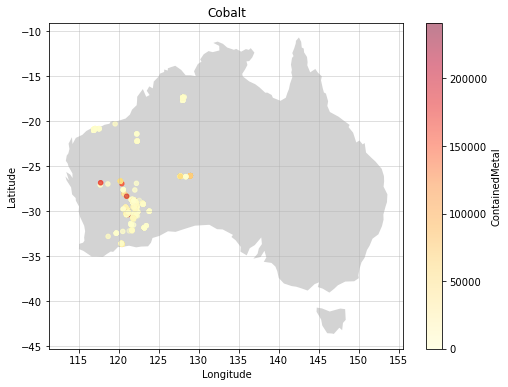

In [82]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title

# plot points
df[df['CommodityName']== 'Cobalt'].plot(x="Longitude", y="Latitude", kind="scatter", c="ContainedMetal", colormap="YlOrRd", 
        title='Cobalt', ax=ax, alpha=0.5)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

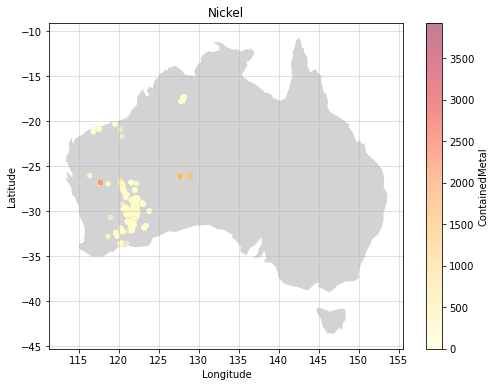

In [86]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title

# plot points
df[df['CommodityName']== 'Nickel'].plot(x="Longitude", y="Latitude", kind="scatter", c="ContainedMetal", colormap="YlOrRd", 
        title='Nickel', ax=ax, alpha=0.5)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

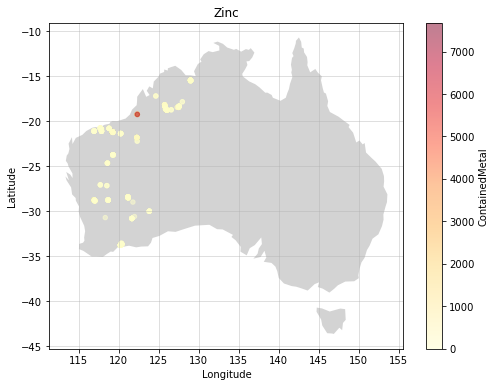

In [85]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title

# plot points
df[df['CommodityName']== 'Zinc'].plot(x="Longitude", y="Latitude", kind="scatter", c="ContainedMetal", colormap="YlOrRd", 
        title='Zinc', ax=ax, alpha=0.5)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()